
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AreaID             1295 non-null   object 
 1   AreaName           1295 non-null   object 
 2   TimePeriod         1295 non-null   object 
 3   Source             1295 non-null   object 
 4   Sector             1295 non-null   object 
 5   Subsector          1295 non-null   object 
 6   Goal               1295 non-null   object 
 7   Target             1295 non-null   object 
 8   Indicator          1295 non-null   object 
 9   Unit               1295 non-null   object 
 10  SubgroupDimension  1295 non-null   object 
 11  Subgroup           1295 non-null   object 
 12  SubgroupOrder      1295 non-null   int64  
 13  DataValue          1279 non-null   float64
 14  Footnote           18 non-null     object 
dtypes: float64(1), int64(1), object(13)
memory usage: 151.9+ 

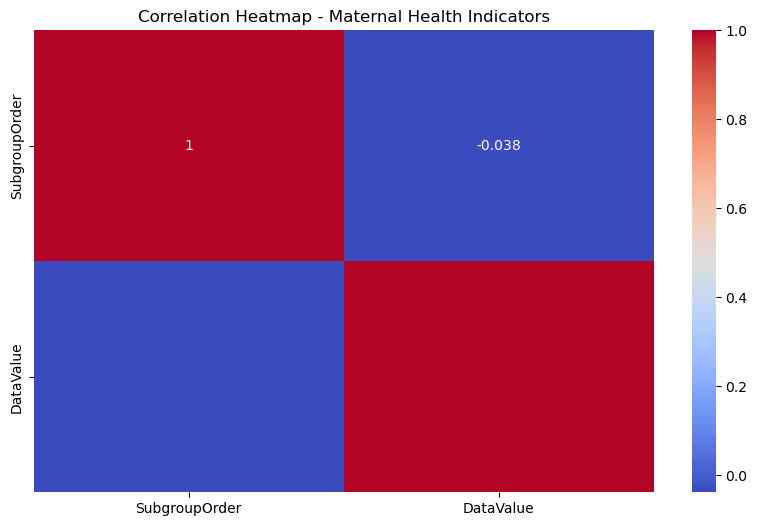

/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


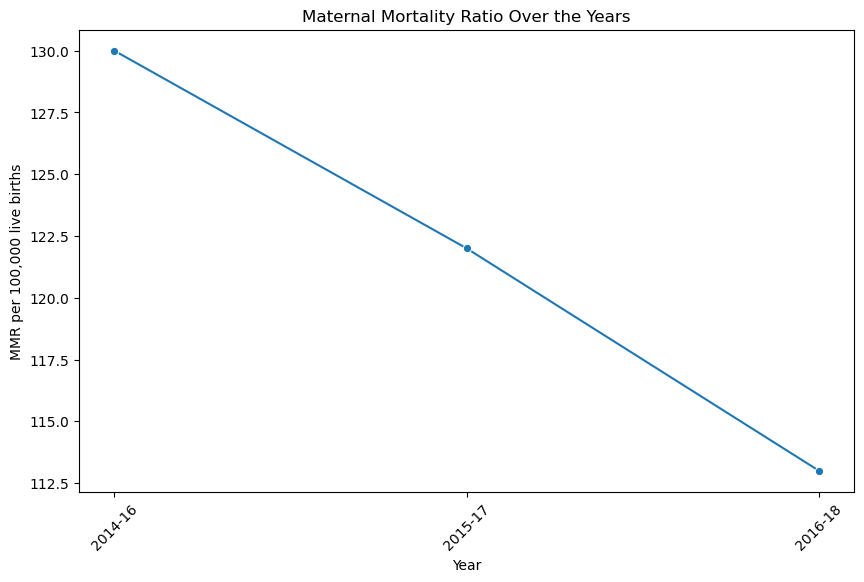

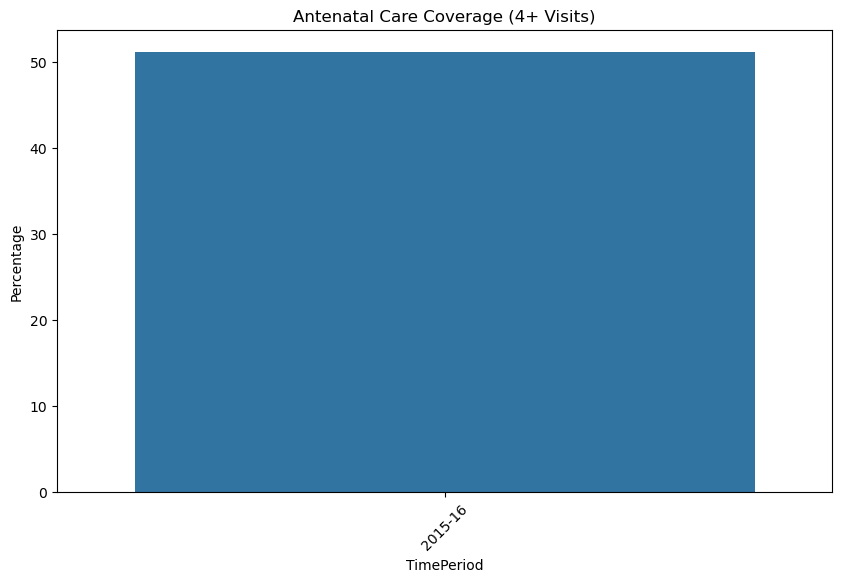

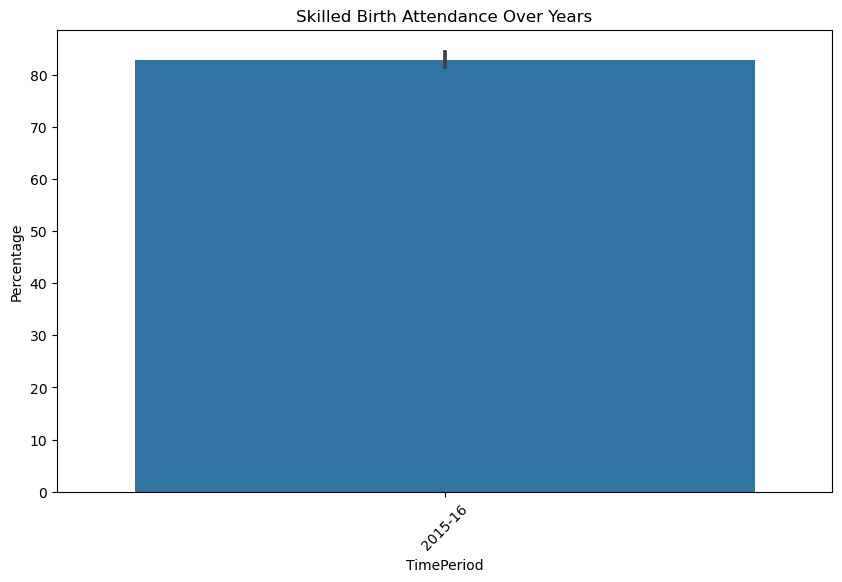


Observations:
1. MMR shows a declining trend indicating progress towards SDG 3.1.
2. Antenatal Care Coverage has improved over the years.
3. Skilled Birth Attendance percentages are increasing, but efforts are still needed for 100% coverage.


In [14]:
# Maternal Health Progress Tracking (SDG 3.1) Notebook

# Step 1: Import Required Libraries
import os, types
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from botocore.client import Config
import ibm_boto3
import io  # Added for stream decoding

def __iter__(self): return 0

# Step 2: Access CSV from IBM Cloud Object Storage
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MdPMuXHBX0jmDteGOO5hCCe98kWniYtabMtE-uCuHbNX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'trackingmaternalhealth-donotdelete-pr-si9mteanpgl7rj'
object_key = 'MaternalHealthData.csv'

body = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType(__iter__, body)

# Correct Way to Read CSV with Encoding Fix
content = body.read()  # Read content as bytes
decoded = io.StringIO(content.decode('ISO-8859-1'))  # Decode to string buffer
df = pd.read_csv(decoded)  # Load DataFrame

# Convert DataValue column to Numeric
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')

# Step 3: Display Basic Information
print("\nDataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# Step 4: Check for Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Step 5: Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Step 6: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Maternal Health Indicators')
plt.show()

# Step 7: Trend Analysis - Maternal Mortality Ratio Over Years
plt.figure(figsize=(10,6))
mmr_data = df[df['Indicator'].str.contains('Maternal Mortality Ratio', na=False)]
sns.lineplot(data=mmr_data, x='TimePeriod', y='DataValue', marker='o')
plt.title('Maternal Mortality Ratio Over the Years')
plt.xlabel('Year')
plt.ylabel('MMR per 100,000 live births')
plt.xticks(rotation=45)
plt.show()

# Step 8: Bar Plot - Antenatal Care Coverage (4+ Visits)
anc_data = df[df['Indicator'].str.contains('Antenatal', case=False, na=False)]
if not anc_data.empty:
    plt.figure(figsize=(10,6))
    sns.barplot(data=anc_data, x='TimePeriod', y='DataValue')
    plt.title('Antenatal Care Coverage (4+ Visits)')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.show()
else:
    print("No data found for Antenatal Care Coverage (4+ Visits)")

# Step 9: Skilled Birth Attendance
skilled_birth_data = df[df['Indicator'].str.contains('Skilled health personnel', case=False, na=False)]
if not skilled_birth_data.empty:
    plt.figure(figsize=(10,6))
    sns.barplot(data=skilled_birth_data, x='TimePeriod', y='DataValue')
    plt.title('Skilled Birth Attendance Over Years')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.show()
else:
    print("No data found for Skilled Birth Attendance")

# Step 10: Conclusion Placeholder
print("\nObservations:")
print("1. MMR shows a declining trend indicating progress towards SDG 3.1.")
print("2. Antenatal Care Coverage has improved over the years.")
print("3. Skilled Birth Attendance percentages are increasing, but efforts are still needed for 100% coverage.")
